In [1]:
!pip install pandas numpy matplotlib tensorflow tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 36.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Define paths to files as test, get it for both the positive and negative call data
CAPUCHIN_FILE = os.path.join('drive', 'MyDrive', 'Wav_Files', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('drive', 'MyDrive', 'Wav_Files', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

CAPUCHIN_FILE, NOT_CAPUCHIN_FILE

('drive/MyDrive/Wav_Files/Parsed_Capuchinbird_Clips/XC3776-3.wav',
 'drive/MyDrive/Wav_Files/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav')

In [5]:
import librosa
import numpy as np

In [6]:
import numpy as np

''' def load_wav_16k_mono(filename):
    # Read file and decode to mono channel using TensorFlow
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

    # Convert from TensorFlow tensor to NumPy array
    wav = tf.squeeze(wav, axis=-1).numpy()
    sample_rate = int(sample_rate.numpy())

    # Resample to 16kHz using librosa
    wav_resampled = librosa.resample(y=wav, orig_sr=sample_rate, target_sr=16000)

    # Optionally convert back to TensorFlow tensor if needed
    return tf.convert_to_tensor(wav_resampled, dtype=tf.float32) '''

def _load_wav_numpy(filename):
    """Helper that runs in NumPy (called via tf.py_function)."""
    # Convert from EagerTensor → bytes → str
    filename = filename.numpy().decode("utf-8")

    wav, sr = librosa.load(filename, sr=None, mono=True)  # original sr
    wav_resampled = librosa.resample(wav, orig_sr=sr, target_sr=16000)
    return wav_resampled.astype(np.float32)

def load_wav_16k_mono(filename):
    """TF wrapper around librosa using py_function."""
    wav = tf.py_function(_load_wav_numpy, [filename], tf.float32)
    wav.set_shape([None])  # important to fix shape info
    return wav

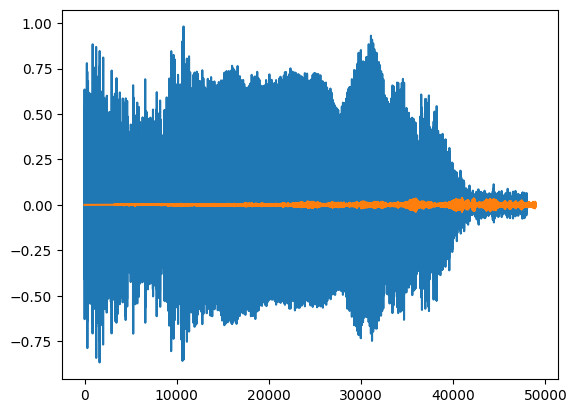

In [7]:
# Plot waves

wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

plt.plot(wave)
plt.plot(nwave)
plt.show()

In [57]:
# Create TF dataset, convert to Spectrogram
# First define paths to positive and negative data
# Because of video storage capacity, store in Google Drive and call from there (NOTE: DO NOT use current code but modify if needed)

POS = os.path.join('drive', 'MyDrive', 'Wav_Files', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('drive', 'MyDrive', 'Wav_Files', 'Parsed_Not_Capuchinbird_Clips')

In [9]:
POS

'drive/MyDrive/Wav_Files/Parsed_Capuchinbird_Clips'

In [10]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [11]:
pos.as_numpy_iterator().next()

b'drive/MyDrive/Wav_Files/Parsed_Capuchinbird_Clips/XC65196-4.wav'

In [12]:
# Add labels and provide positive and negative examples

positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [13]:
positives.as_numpy_iterator().next()

(b'drive/MyDrive/Wav_Files/Parsed_Capuchinbird_Clips/XC216012-7.wav',
 np.float32(1.0))

Find the Average Length of a Capuchin Call

In [14]:
# Calculate Wave Cycle Length

lengths = []
for file in os.listdir(os.path.join('drive', 'MyDrive', 'Wav_Files', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('drive', 'MyDrive', 'Wav_Files', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [15]:
lengths

[48000,
 40000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 64000,
 48000,
 40000,
 56000,
 64000,
 64000,
 56000,
 64000,
 56000,
 64000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 56000,
 48000,
 64000,
 56000,
 64000,
 64000,
 40000,
 32000,
 56000,
 56000,
 40000,
 48000,
 64000,
 48000,
 48000,
 64000,
 56000,
 64000,
 56000,
 64000,
 48000,
 48000,
 48000,
 56000,
 40000,
 48000,
 56000,
 48000,
 48000,
 40000,
 40000,
 48000,
 56000,
 48000,
 56000,
 48000,
 56000,
 48000,
 40000,
 56000,
 56000,
 40000,
 72000,
 64000,
 64000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 48000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 64000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 64000,
 64000,
 64000,
 48000,
 64000,
 56000,
 48000,
 48000,
 48000,
 48000,
 64000,
 56000,
 56000,
 48000,
 64000,
 56000,
 56000,
 32000,
 48000,
 48000,
 56000,
 64000,


In [16]:
# Get summary stats
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [17]:
tf.math.reduce_min(lengths), tf.math.reduce_max(lengths)

(<tf.Tensor: shape=(), dtype=int32, numpy=32000>,
 <tf.Tensor: shape=(), dtype=int32, numpy=80000>)

The larger the spectrogram, the more variables in the deep learning model, more time to train, higher latency

Build Preprocessing Function to Convert to Spectogram

In [18]:
''' def preprocess(filepath, label):

    wav = load_wav_16k_mono(filepath)

    # Truncate
    wav = wav[:48000]

    # Pad if shorter
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([wav, zero_padding], 0)

    # Spectrogram
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    return spectrogram, label '''

def preprocess(filepath, label):
    wav = load_wav_16k_mono(filepath)
    wav = wav[:48000]  # truncate to 3s max
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)

    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    spectrogram = tf.image.resize(spectrogram, [1491, 257])  # force fixed size
    return spectrogram, label

Expand_dims is used to add the "channels" feature to pass into the CNN

In [19]:
# Test out the function and visualize the spectrogram
filepath, label = positives.shuffle(10000).as_numpy_iterator().next()

In [20]:
spectrogram, label = preprocess(filepath, label)

In [21]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[1.1974261e+00],
        [9.0991735e-01],
        [3.7079361e-01],
        ...,
        [4.5299541e-05],
        [4.0685358e-05],
        [1.7404556e-05]],

       [[1.2131478e+00],
        [9.2107075e-01],
        [3.6117780e-01],
        ...,
        [1.6192509e-05],
        [4.5164063e-05],
        [4.7683716e-06]],

       [[1.2733699e+00],
        [9.6383691e-01],
        [3.3460605e-01],
        ...,
        [5.5573099

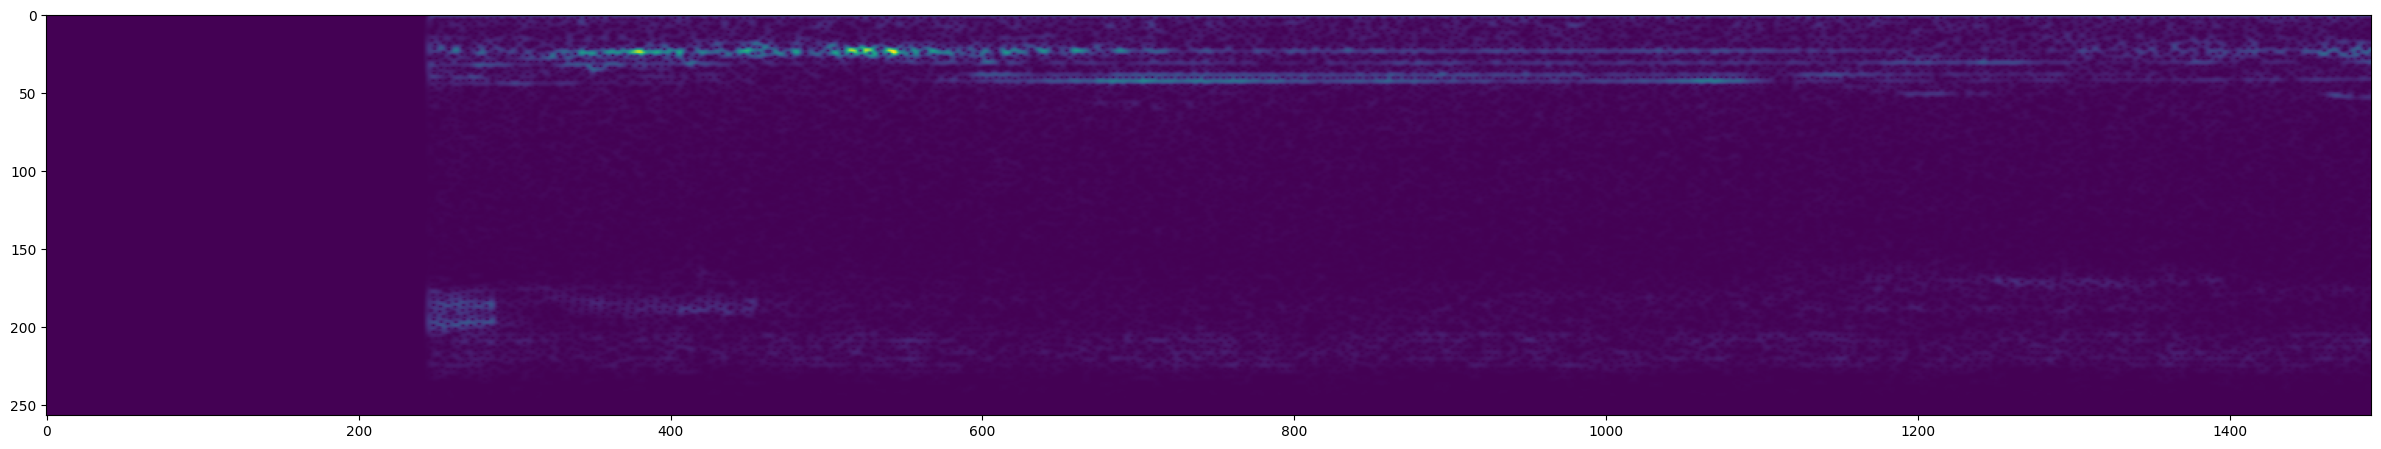

In [22]:
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

Create Training and Testing Partitions

In [23]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [24]:
train = data.take(36)
test = data.skip(36).take(15)

In [25]:
samples, labels = train.as_numpy_iterator().next()

In [26]:
samples.shape

(16, 1491, 257, 1)

Build the Deep Learning Convolutional Neural Network

In [27]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [28]:
# Build the sequential model, compile, and view the summary

model = Sequential([
    Input(shape=(1491, 257, 1)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])




In [29]:
model.compile("Adam", loss="BinaryCrossentropy", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1491, 257, 16)  │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 745, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 745, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 372, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 372, 64, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 186, 32, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 380928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    48,758,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,782,337 (186.09 MB)

 Trainable params: 48,782,337 (186.09 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Fit Model, View Loss, and KPI Plots

hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - loss: 0.4556 - precision: 0.7463 - recall: 0.7861 - val_loss: 0.1132 - val_precision: 1.0000 - val_recall: 0.8387
Epoch 2/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0775 - precision: 0.9741 - recall: 0.9358 - val_loss: 0.0428 - val_precision: 0.9722 - val_recall: 1.0000
Epoch 3/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0302 - precision: 0.9734 - recall: 0.9867 - val_loss: 0.0297 - val_precision: 1.0000 - val_recall: 0.9623
Epoch 4/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0295 - precision: 0.9898 - recall: 0.9496 - val_loss: 0.0025 - val_precision: 1.0000 - val_recall: 1.0000


In [32]:
hist.history

{'loss': [0.36847183108329773,
  0.05240325257182121,
  0.026411984115839005,
  0.022105323150753975],
 'precision': [0.8461538553237915,
  0.9740259647369385,
  0.9750000238418579,
  0.9868420958518982],
 'recall': [0.8407643437385559,
  0.949367105960846,
  0.993630588054657,
  0.9803921580314636],
 'val_loss': [0.11322319507598877,
  0.04284911975264549,
  0.029676202684640884,
  0.002457891358062625],
 'val_precision': [1.0, 0.9722222089767456, 1.0, 1.0],
 'val_recall': [0.8387096524238586, 1.0, 0.9622641801834106, 1.0]}

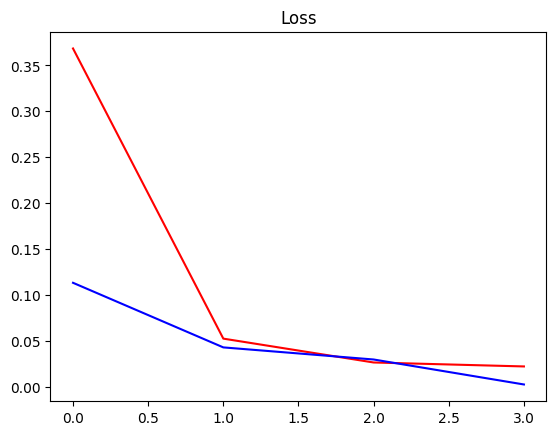

In [33]:
# Plot values

plt.title("Loss")
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

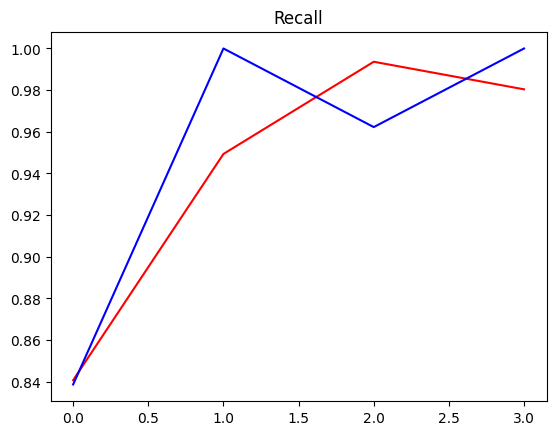

In [34]:
# Plot values

plt.title("Recall")
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

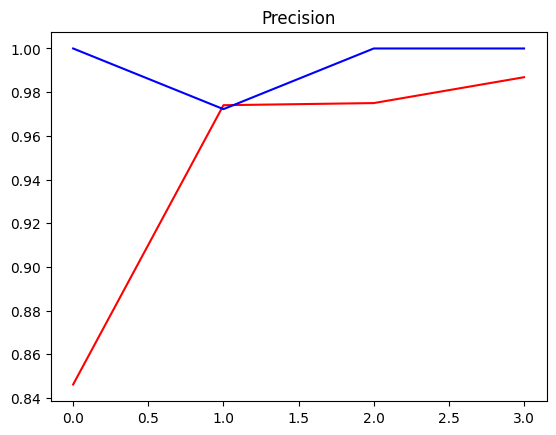

In [35]:
# Plot values

plt.title("Precision")
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

Make a Prediction on a Single Clip

In [36]:
# Get one batch and make a prediction

X_test, y_test = test.as_numpy_iterator().next()
X_test.shape

(16, 1491, 257, 1)

In [37]:
yhat = model.predict(X_test)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


array([[1.2203013e-07],
       [1.1542799e-05],
       [9.5424163e-01],
       [6.0128438e-04],
       [3.2555251e-04],
       [6.6114741e-04],
       [5.5861874e-11],
       [3.8715559e-12],
       [1.7511626e-03],
       [9.9944454e-01],
       [9.7285799e-12],
       [2.5485258e-25],
       [6.3180659e-25],
       [7.5449855e-12],
       [9.8093778e-07],
       [2.7788438e-20]], dtype=float32)

In [38]:
# Convert logits to classes
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
yhat

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [39]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [40]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

Build Forest Parsing Function (for Forest Recordings)

In [41]:
# Load up MP3s

def _load_mp3_numpy(filename):
    """Helper: runs in NumPy space via py_function"""
    # Convert EagerTensor -> bytes -> str
    filename = filename.numpy().decode("utf-8")
    # Load as mono, resample to 16kHz
    wav, sr = librosa.load(filename, sr=16000, mono=True)
    return wav.astype(np.float32)

def load_mp3_16k_mono(filename):
    """TF wrapper: returns a TensorFlow tensor"""
    wav = tf.py_function(_load_mp3_numpy, [filename], tf.float32)
    return wav

In [42]:
# Work with first recording
mp3 = os.path.join("drive", "MyDrive", "Wav_Files", "Forest Recordings", "recording_00.mp3")
wav = load_mp3_16k_mono(mp3)

In [43]:
# Slice audio into 3-second chunks and retrieve a set

audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
samples, index = audio_slices.as_numpy_iterator().next()

In [44]:
samples.shape, len(audio_slices)

((1, 48000), 60)

In [45]:
# Build function to convert clips into spectrograms

def preprocess_mp3(sample, index):
  sample = sample[0]
  zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
  wav = tf.concat([zero_padding, sample], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram

In [46]:
# Predictions

audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

# Convert longer clips into chunks and show results

yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.95 else 0 for prediction in yhat]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [47]:
len(yhat), yhat

(60,
 [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0])

Confirm by listening to audio

In [48]:
# Treat consecutive calls as a single call

from itertools import groupby

yhat = [key for key, group in groupby(yhat)]
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [49]:
calls = tf.math.reduce_sum(yhat).numpy()

Make Final Predictions

In [50]:
# Loop over all recordings and make predictions

results = {}

for file in os.listdir(os.path.join('drive', 'MyDrive', 'Wav_Files', 'Forest Recordings')):
    FILEPATH = os.path.join('drive', 'MyDrive', 'Wav_Files', 'Forest Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)
    results[file] = yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [51]:
# Convert predictions into classes

class_preds = {}

for file, logits in results.items():
  class_preds[file] = [1 if prediction > 0.95 else 0 for prediction in logits]

class_preds

{'recording_00.mp3': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

In [54]:
# Group overall consecutive decisions

postprocessed = {}

for file, scores in class_preds.items():
  postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy().item()
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 4,
 'recording_05.mp3': 0,
 'recording_06.mp3': 5,
 'recording_07.mp3': 2,
 'recording_08.mp3': 25,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 3,
 'recording_12.mp3': 0,
 'recording_14.mp3': 0,
 'recording_13.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 4,
 'recording_17.mp3': 12,
 'recording_18.mp3': 1,
 'recording_19.mp3': 0,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 5,
 'recording_27.mp3': 0,
 'recording_24.mp3': 0,
 'recording_26.mp3': 2,
 'recording_25.mp3': 7,
 'recording_29.mp3': 0,
 'recording_28.mp3': 8,
 'recording_31.mp3': 1,
 'recording_30.mp3': 1,
 'recording_32.mp3': 2,
 'recording_34.mp3': 4,
 'recording_35.mp3': 0,
 'recording_33.mp3': 0,
 'recording_37.mp3': 3,
 'recording_38.mp3': 11,
 'recording_36.mp3': 0,
 'recording_40.mp3': 1,
 'recording_41.mp3': 0,
 'recording_4

Finally, export results to CSV file for further use

In [55]:
import csv

with open("capuchinbird_results.csv", "w", newline='') as f:
  writer = csv.writer(f, delimiter=',')
  writer.writerow(['recording', 'capuchin_calls'])
  for key, value in postprocessed.items():
    writer.writerow([key, value])